# Traffic Accidents
#### By Yicheng Shen

The data are made available online by the UK Government. It covers all recorded accidents in Edinburgh in 2018 (some of the variables were modified for the purposes of this assignment). The data can be found in data/accidents.csv. You can find out more about the dataset by reading its documentation in data/accidents.md.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
accidents = pd.read_csv("data/accidents.csv")

In [11]:
accidents['new_time'] = pd.to_datetime(accidents['time']).dt.hour * 60 + pd.to_datetime(accidents['time']).dt.minute

In [12]:
accidents['severity']=accidents['severity'].astype('category')
accidents['severity']=accidents['severity'].cat.reorder_categories(['Fatal', 'Serious', 'Slight'])

In [13]:
week_dict = {
    'Monday': 'Weekday', 
    'Tuesday': 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday': 'Weekday', 
    'Friday': 'Weekday',
    'Saturday': 'Weekend',    
    'Sunday': 'Weekend',
}
accidents['Week'] = accidents['day_of_week'].replace(week_dict)

<Figure size 600x200 with 0 Axes>

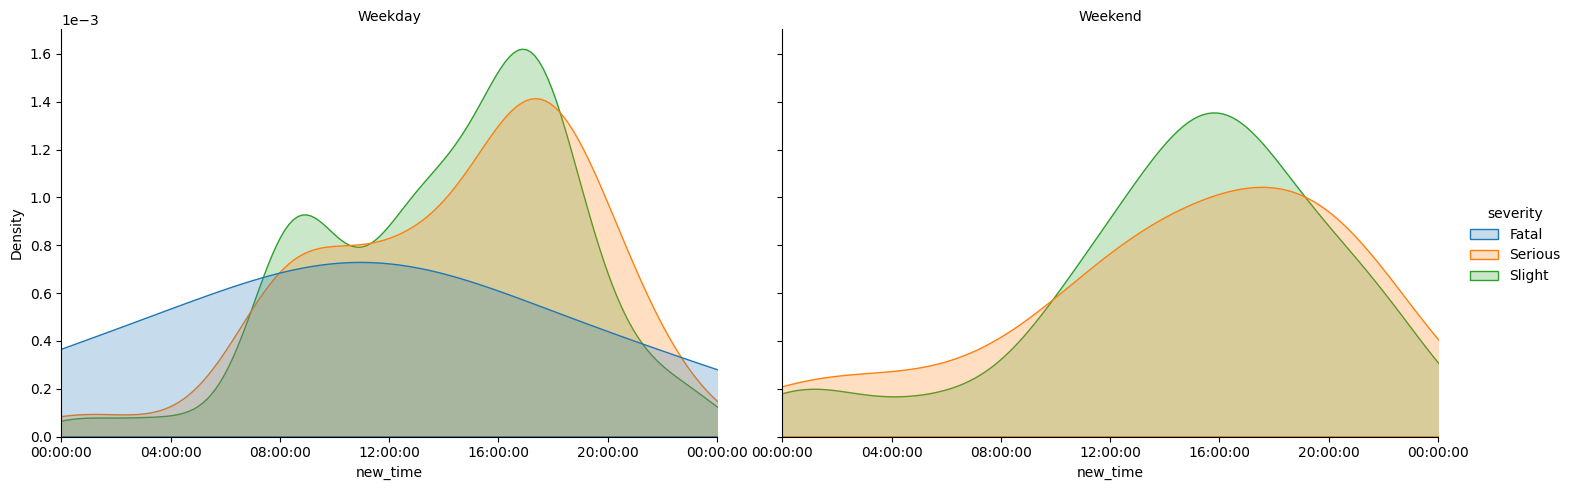

In [14]:
plt.figure(
  figsize=(6, 2), 
  layout="constrained"
)

#colors = {'Fatal': 'g', 'Serious': 'r', 'Slight': 'b'}
#palette = sns.set_palette(colors.values())

sns.displot(accidents, x="new_time", hue="severity", col = "Week", common_norm = False,
            kind="kde", aspect = 1.5, fill=True).set_titles(col_template="{col_name}")
plt.xlim(0, 1440)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,5))
plt.xticks(range(0, 1441, 240), [f'{4*h:02d}:00:00' for h in [0,1,2,3,4,5,0]])
plt.subplots_adjust(wspace=0.1)
plt.show()

From the visualization above, we can observe that during weekdays, there are two noticable peaks of serious and slight accidents at the morning (08:00) and evening (17:00) rush hours. We should be especially careful during these times. In addition, fatal accidents happen more in the early half of the day, but the peak is less apparent, so people should guard against fatal accidents even at night. 

During the weekends, accidents tend to peak around late afternoons and early evenings. People should be more careful after noon. 